This example intends to show how to import modules and read the documentation of functions in this package.

In [1]:
#import the spin subpackage from ion_chain.operator and call it "spin" for futher usage
import Qsim.operator.spin as spin
#print the discription of the package and list the name of all functions
print(spin.__doc__)
import qutip
qutip.settings.has_mkl = False  # to avoid OS error in my PC

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Operators on spin space
functions: sx, sy, sz, sry, zero_op, sI, phid, phiup, spin_state   
@author: zhumj



In [2]:
#print the documentation for function sx
help(spin.sx)

Help on function sx in module Qsim.operator.spin:

sx(N=1, i=0)
    generate the sigmax operator acting on the ith (python index) spin 1/2
    in the system of N ions
    Input: 
        N: int
            number of ions in the system, N > 1
        i: int 
            python index of the ion that the operator acts on, from 0 to N-1
    Output:
        Qutip Operator



In [3]:
#%% this part illustrates how to use class ions 
#import all functions of ion_system.py from ion_chain.ising 
from  Qsim.ion_chain.ion_system import *

In [4]:
# see the documents for ions class
help(ions)


Help on class ions in module Qsim.ion_chain.ion_system:

class ions(builtins.object)
 |  ions(trap_config={'N': 2, 'fx': 2, 'fz': 1}, numeric_config={'active_spin': [0, 1], 'active_phonon': [[0, 1]], 'pcut': [[5, 5]]}, cooling_config={'gamma': [2.0, 2.0], 'coolant': [1]})
 |  
 |  this class is used to store the parameters of a N ion system couples to a 
 |  single laser drive in Axial or Radial direction, assuming the two radial 
 |  directions are equivalent object attributes to be set directly
 |  ion_config:
 |  N : int
 |      number of ions in the system
 |  fz : float
 |      axial frequency of the ion trap, [MHz]
 |  fx : float
 |      transverse frequency of the ion trap, [MHz]
 |      
 |  laser_config:
 |  Omega_eff: float
 |       effective laser_dipole Rabi frequency Omega * dK * X_0(fx) [kHz],
 |  laser_couple: list of int
 |      ion index that couples to the laser, for instance [0,1] means couple to 
 |      ion 0, 1
 |  delta: float
 |      Laser detuning from a specif

In [21]:
#read document for a specific function in this class
help(ions.alpha)

Help on function alpha in module Qsim.ion_chain.ion_system:

alpha(self)
    compute anisotropy coefficient of the trap
    Returns
    -------
    float, unit of 1



In [22]:
#%% construct a 2 ion system with default parameters
two_ion_sys = ions()
#list all attributes
print(two_ion_sys.__dict__)

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Ions class object initialized.
{'N': 2, 'fx': 2, 'fz': 1, 'equi_posi': array([-0.62996052,  0.62996052]), 'a_matrix': array([[ 2., -1.],
       [-1.,  2.]]), 'r_matrix': array([[3.5, 0.5],
       [0.5, 3.5]]), 'axial_eval': array([1., 3.]), 'radial_eval': array([4., 3.]), 'axial_mode': array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]]), 'radial_mode': array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]), 'axial_freq': array([1.        , 1.73205081]), 'radial_freq': array([2.        , 1.73205081]), 'ah_epsilon_val': 0.0004959419689930792, 'ah_C_tensor': array([[[ 0.39685026, -0.39685026],
        [-0.39685026,  0.39685026]],

       [[-0.39685026,  0.

In [23]:
#%% initialize a 3 ion system with laser drive in axial direction and coupled to
#all 3 ions. Consider all 3 axial phonon modes and set phonon space cutoff as 5
three_ion_sys = ions(trap_config={'N': 3, 'fx': 2, 'fz': 1}, 
                   numeric_config={'active_spin':[0,1,2], 'active_phonon': [[0, 1, 2]], 'pcut': [[5, 5, 5]]},
                   cooling_config={'gamma': [2.0, 2.0, 2.0], 'coolant': [2]}
                   )
three_ion_sys .list_para()

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Ions class object initialized.
________________________________________________________________
********************Setup of the Trap************************
number of ions 3
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  2 [MHz]
Axial vibrational eigenfrequency [1.   1.73 2.41] MHz
Radial (Transverse) vibrational eigenfrequency [2.   1.73 1.26] MHz
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1, 2]]
corresonding phonon space cutoff  [[5, 5, 5]]
********************Config of Cooling************************
Effectiv

In [8]:
#%% update radial confining frequency and recompute related parameters
three_ion_sys.fx = 3
three_ion_sys.update_trap()
three_ion_sys.list_para()

Trap coefficients updated
Anharmonic coefficients updated
________________________________________________________________
********************Setup of the Trap************************
number of ions 3
Axial COM (Confining) frequency  1  [MHz]
Radial COM (Confining) frequency  3 [MHz]
Axial vibrational eigenfrequency [1.   1.73 2.41] MHz
Radial (Transverse) vibrational eigenfrequency [3.   2.83 2.57] MHz
                                                                 
********************Config of Numeric Calculation************************
index of phonon space included in simulation:  [[0, 1, 2]]
corresonding phonon space cutoff  [[5, 5, 5]]
********************Config of Cooling************************
Effective cooling rate  [2. 2. 2.]  [kHz]
Coolant index  [2]


It is important to call .update_trap/update_all method to update attributes that are not set directly. 

In [9]:
#%%print axial tilt mode and corresponding eigenfrequencies
print('axial tilt mode')
print(three_ion_sys.axial_mode[1])
print('axial tilt eigenfrequency [MHz]')
print(three_ion_sys.axial_freq[1])

axial tilt mode
[ 7.07106781e-01  1.64784472e-12 -7.07106781e-01]
axial tilt eigenfrequency [MHz]
1.73205080756888


In [10]:
#this part illustrate how to use class 'laser'
help(Laser)

Help on class Laser in module Qsim.ion_chain.ion_system:

class Laser(builtins.object)
 |  Laser(config={'Omega_eff': 10, 'wavevector': 1, 'Dk': 25030326.412159804, 'laser_couple': [0, 1], 'mu': 1000.0, 'phase': 0})
 |  
 |  Methods defined here:
 |  
 |  Omega(self, ion0)
 |      compute real rabi frequency [2pi kHz] in a given laser direction
 |      
 |      Parameters
 |      ----------
 |      ion0 : ions class object
 |      laser0 : Laser class object
 |      
 |      Returns
 |      -------
 |      float
 |  
 |  Recoil_freq(self)
 |      comupte recoil frequency in 2pi Hz
 |  
 |  __init__(self, config={'Omega_eff': 10, 'wavevector': 1, 'Dk': 25030326.412159804, 'laser_couple': [0, 1], 'mu': 1000.0, 'phase': 0})
 |      Initialize laser class object with given parameters
 |      Parameters
 |      ----------
 |      laser_config : dict, optional
 |          parameters for laser configuration.
 |          The default is {'Omega_eff':10,'df_laser':1,'laser_couple':[0,1],
 |     

In [24]:
#construct a laser drive with default parameters
laser1 = Laser()
#list all attributes
print(laser1 .__dict__)

Laser parameters updated
Lasers class object initialized.
{'Omega_eff': 10, 'wavevector': 1, 'laser_couple': [0, 1], 'mu': 1000.0, 'phase': 0, 'Dk': 25030326.412159804, 'R': 116341.3191186837}


In [12]:
#update effective laser frequency [kHz] 
laser1.mu = three_ion_sys.fx *1000 + 10
laser1.list_para()

                                                                 
********************Parameters of Laser Drive************************
Vibrational degree of freedom couples to the laser: Transverse (Radial)
index of ions that couple to the laser field:  [0, 1]
Effective rabi frequency  10  [kHz]
Effective laser frequency  3010  [kHz]
Laser phase phis 0.0
(input in rad but displayed in degs)


In [13]:
import Qsim.ion_chain.interaction.spin_phonon as Isp
#this part is about how to use object method, attributes of ions, laser class 
#compute the real rabi frequency based on the effective rabi frequency set
print('Rabi frequency in 2pi kHz', laser1.Omega(three_ion_sys))
#using Laser, ions class object to compute radial Lamb-Dicke coefficients \eta _ im 
LD_mat = np.zeros([3,3])
for i in range(3):
    for m in range(3):
        LD_mat[m,i] = laser1.eta(three_ion_sys.radial_freq[m])* three_ion_sys.radial_mode[m,i]
        #note for convenience of indexing the order of ion index i and mode index m has been switched
        #or compute using specialized function LD_coeff
        #LD_mat[m,i] = Isp.LD_coef(three_ion_sys,laser1,i,m)
print('Lamb Dicke Coefficients') 
print(LD_mat)

Rabi frequency in 2pi kHz 799.7669222130278
Lamb Dicke Coefficients
[[ 4.53581991e-02  4.53581991e-02  4.53581991e-02]
 [-5.72123205e-02 -1.33314093e-13  5.72123205e-02]
 [ 3.46589538e-02 -6.93179075e-02  3.46589538e-02]]


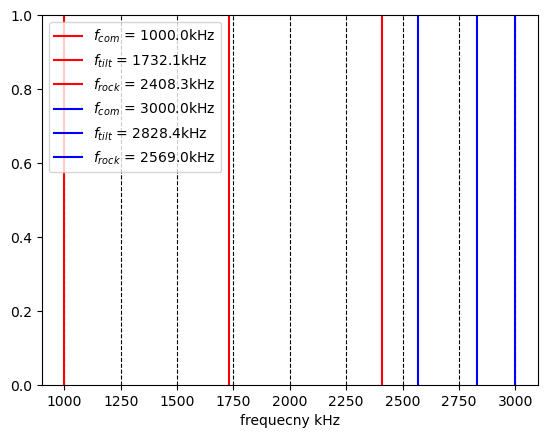

In [14]:
#plot all eigenfrequencies
plot_all_freq(three_ion_sys)
#the other way is to call plot_N_freq, this function also works for N>3
#plot_N_freq(three_ion_sys)

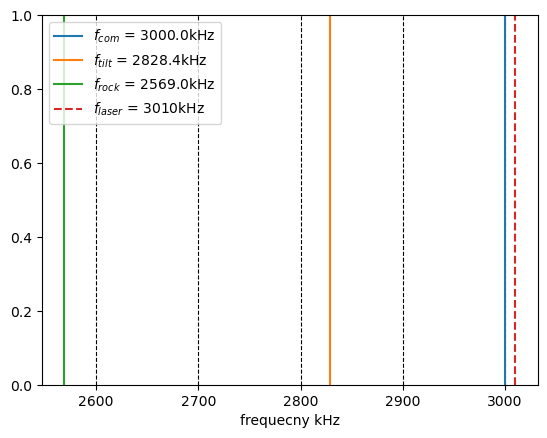

In [15]:
#plot radial eigenfrequencies and effective laser frequency \mu
plot_freq(three_ion_sys,laser1)